# FREDの米国経済指標の取得

## Fred API
- 参考:https://www.youtube.com/watch?v=OjlMTN4Uq0k&ab_channel=K_DM%E3%80%90%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92xPython%E3%80%91  
- 公式ページ：https://fred.stlouisfed.org/docs/api/fred/?ref=datons.ai
- 取得したAPIキーを、新しい環境変数FRED_API_KEYに登録：
    - https://qiita.com/redrabbit1104/items/38a2011c27048ca61794  
    - https://qiita.com/w_tkmn/items/5f23211d49bfbfc667af
    - https://kakakakakku.hatenablog.com/entry/2019/03/01/222035
    - ターミナルやシェルで設定した環境変数が、IDE内の実行環境に引き継がれないことがある。→IDE内の環境設定を確認し、環境変数が引き継がれるように設定


## 米国経済指標  


FRED（Federal Reserve Economic Data）APIは、経済や金融市場のデータを提供するもので、様々なデータが利用されています。以下はFRED APIでよく利用されるデータの代表例です：

GDP（国内総生産）
経済の全体的な規模や成長率を把握するために使用されます。
例: "Gross Domestic Product (GDP)"（コード: GDP）

失業率（Unemployment Rate）
労働市場の健全性を評価するために使われます。
例: "Unemployment Rate"（コード: UNRATE）

CPI（消費者物価指数）
インフレーションの指標として使用され、価格の変動を追跡します。
例: "Consumer Price Index for All Urban Consumers"（コード: CPIAUCSL）

金利（Interest Rates）
経済政策の重要な指標で、短期および長期の金利に関するデータがあります。
例: "Effective Federal Funds Rate"（コード: FEDFUNDS）

住宅市場データ（Housing Market Data）
住宅価格や住宅販売数など、経済全体に大きな影響を与える指標です。
例: "House Price Index"（コード: HPIPONM226S）

インフレーション期待（Inflation Expectations）
市場や消費者が将来のインフレをどのように見ているかを示します。
例: "5-Year, 5-Year Forward Inflation Expectation Rate"（コード: T5YIFR）

M2（マネーサプライ）
経済に流通している貨幣の総量を示し、金融政策の効果を測るために使われます。
例: "M2 Money Stock"（コード: M2SL）
これらのデータセットは、経済分析、金融市場予測、政策立案などの分野で幅広く活用されています。

企業利益（Corporate Profits）
企業の収益性や経済全体の健康状態を示す指標です。
例: "Corporate Profits After Tax"（コード: CP）

貿易収支（Trade Balance）
国の輸出入の差を示し、経済の国際的な競争力を反映します。
例: "U.S. International Trade in Goods and Services"（コード: BOPGSTB）

個人消費支出（Personal Consumption Expenditures, PCE）
消費者の支出動向を把握するために使われる重要なデータで、特にインフレ指標としても注目されます。
例: "Personal Consumption Expenditures"（コード: PCE）

労働市場データ（Employment Data）
雇用状況に関する詳細なデータが含まれ、失業率だけでなく、雇用者数や労働力参加率なども利用可能です。
例: "Total Nonfarm Payrolls"（コード: PAYEMS）

生産者物価指数（Producer Price Index, PPI）
企業が購入する商品の価格を追跡し、コストの変動を把握するための指標です。
例: "Producer Price Index by Commodity"（コード: PPIACO）

ISM製造業指数（ISM Manufacturing Index）
製造業の活動状況を示す経済指標で、景気の拡大・縮小を早期に察知するために利用されます。
例: "ISM Manufacturing: PMI Composite Index"（コード: NAPM）

住宅着工件数（Housing Starts）
新たに建設が開始された住宅の数で、住宅市場や経済全体の先行指標とされます。
例: "Housing Starts: Total New Privately Owned"（コード: HOUST）

小売売上高（Retail Sales）
消費支出の動向を把握するために使われる指標で、消費者の購買力や景気の動きを示します。
例: "Advance Retail Sales: Retail Trade"（コード: RSXFS）

金融ストレス指数（Financial Stress Index）
金融市場におけるリスクや不確実性を測定する指標です。
例: "St. Louis Fed Financial Stress Index"（コード: STLFSI2）

政府債務（Government Debt）
政府の負債状況や財政健全性を示す指標です。
例: "Federal Debt: Total Public Debt"（コード: GFDEBTN）

消費者信頼感指数（Consumer Confidence Index）
消費者の経済に対する信頼感を示し、将来の消費行動や経済成長を予測するのに使われます。
例: "Consumer Sentiment Index"（コード: UMCSENT）

耐久財受注（Durable Goods Orders）
景気の先行指標として使われ、企業の投資や消費者の大きな支出を反映します。
例: "New Orders for Durable Goods"（コード: DGORDER）



## コード

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from fredapi import Fred

In [2]:
# 環境変数からAPIキーを取得
# ターミナルからjupyter labを起動する前に「export FRED_API_KEY='（API入力）'」を実行しておくこと

API_KEY = os.getenv("FRED_API_KEY")
if API_KEY is None:
    raise ValueError("APIキーが環境変数から取得できていないので、FRED_API_KEYを設定すること。")


In [3]:
# 取得するデータのコード
data_codes = {
    "GDP": "国内総生産 (GDP)",
    "UNRATE": "米国失業率",
    "CPIAUCSL": "消費者物価指数 (CPI)",
    # "CORESTICKM159SFRBATL": "スティッキープライス消費者物価指数（食料とエネルギーを除く）",
    # "MEDCPIM158SFRBCLE": "消費者物価指数CPI",
    "FEDFUNDS": "フェデラルファンド金利",
    "HPIPONM226S": "住宅価格指数",
    "T5YIFR": "5年後の5年間のインフレ期待率",
    "M2SL": "M2マネーストック",
    "CP": "企業利益（税引後）",
    "BOPGSTB": "国際貿易収支（商品とサービス）",
    "PCE": "個人消費支出 (PCE)",
      #PCE 個人消費支出
    # "DPCERD3Q086SBEA" "個人消費支出 (暗黙の価格デフレーター)",
    # "PCEPILFE": "食料・エネルギーを除く個人消費支出（連鎖型物価指数）",
    "PAYEMS": "非農業部門雇用者数",
    "PPIACO": "生産者物価指数 (PPI)",
    "NAPM": "ISM製造業指数",
    "HOUST": "住宅着工件数",
    "RSXFS": "小売売上高",
    "STLFSI2": "セントルイス連邦準備銀行金融ストレス指数",
    "GFDEBTN": "連邦政府債務（総額）",
    "UMCSENT": "消費者信頼感指数",
    "DGORDER": "耐久財受注",
    "SP500": "SP500",
    "DFEDTARU":"米国政策金利",
    "T10Y2Y": "長短金利差（10年米国債と2年米国債）",
    "DGS10": "長期金利　10年",
    "DGS2": "短期金利　2年"
}

In [4]:
fred = Fred(api_key=API_KEY)

# データ取得
def get_fred_data(fred, data_codes):
    data_dict = {}
    for code, description in data_codes.items():
        try:
            # FREDからデータを取得
            data = fred.get_series(code)
            data_dict[description] = data
            print(f"取得成功：{description} ({code})")
        except Exception as e:
            print(f"取得失敗：{description} ({code}): {e}")
    return data_dict

# すべてのデータを1つのデータフレームに統合
def combine_fred_data(fred_data):
    combined_df = pd.DataFrame()

    for description, data in fred_data.items():
        # データをDataFrameに変換し、列名を説明に変更
        df = pd.DataFrame(data, columns=[description])
        
        # combined_dfに結合（期間が異なる場合はNaNで埋める）
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = combined_df.join(df, how='outer')
    
    return combined_df



fred_data = get_fred_data(fred, data_codes)
all_data_df = pd.DataFrame(fred_data)
all_data_df.to_csv('fred_data.csv', index=True)

GDP
国内総生産 (GDP)
取得成功：国内総生産 (GDP) (GDP)
UNRATE
米国失業率
取得成功：米国失業率 (UNRATE)
CPIAUCSL
消費者物価指数 (CPI)
取得成功：消費者物価指数 (CPI) (CPIAUCSL)
FEDFUNDS
フェデラルファンド金利
取得成功：フェデラルファンド金利 (FEDFUNDS)
HPIPONM226S
住宅価格指数
取得成功：住宅価格指数 (HPIPONM226S)
T5YIFR
5年後の5年間のインフレ期待率
取得成功：5年後の5年間のインフレ期待率 (T5YIFR)
M2SL
M2マネーストック
取得成功：M2マネーストック (M2SL)
CP
企業利益（税引後）
取得成功：企業利益（税引後） (CP)
BOPGSTB
国際貿易収支（商品とサービス）
取得成功：国際貿易収支（商品とサービス） (BOPGSTB)
PCE
個人消費支出 (PCE)
取得成功：個人消費支出 (PCE) (PCE)
PAYEMS
非農業部門雇用者数
取得成功：非農業部門雇用者数 (PAYEMS)
PPIACO
生産者物価指数 (PPI)
取得成功：生産者物価指数 (PPI) (PPIACO)
NAPM
ISM製造業指数
取得失敗：ISM製造業指数 (NAPM): Bad Request.  The series does not exist.
HOUST
住宅着工件数
取得成功：住宅着工件数 (HOUST)
RSXFS
小売売上高
取得成功：小売売上高 (RSXFS)
STLFSI2
セントルイス連邦準備銀行金融ストレス指数
取得成功：セントルイス連邦準備銀行金融ストレス指数 (STLFSI2)
GFDEBTN
連邦政府債務（総額）
取得成功：連邦政府債務（総額） (GFDEBTN)
UMCSENT
消費者信頼感指数
取得成功：消費者信頼感指数 (UMCSENT)
DGORDER
耐久財受注
取得成功：耐久財受注 (DGORDER)
SP500
SP500
取得成功：SP500 (SP500)
DFEDTARU
米国政策金利
取得成功：米国政策金利 (DFEDTARU)
T10Y2Y
長短金利差（10年米国債と2年米国債）
取得成功：長短金利差（10年米国債と2年米国債） (T10Y2Y)
DGS10
長期金利　10年

In [5]:
all_data_df.isnull().sum()

国内総生産 (GDP)             18442
米国失業率                   17832
消費者物価指数 (CPI)           17820
フェデラルファンド金利             17910
住宅価格指数                  18350
5年後の5年間のインフレ期待率         13321
M2マネーストック               17965
企業利益（税引後）               18442
国際貿易収支（商品とサービス）         18361
個人消費支出 (PCE)            17965
非農業部門雇用者数               17724
生産者物価指数 (PPI)           17412
住宅着工件数                  17965
小売売上高                   18361
セントルイス連邦準備銀行金融ストレス指数    17289
連邦政府債務（総額）              18518
消費者信頼感指数                18101
耐久財受注                   18362
SP500                   16235
米国政策金利                  13000
長短金利差（10年米国債と2年米国債）      6682
長期金利　10年                 3091
短期金利　2年                  6683
dtype: int64

In [6]:
len(all_data_df)

18752

In [7]:
all_data_df.head()

,国内総生産 (GDP),米国失業率,消費者物価指数 (CPI),フェデラルファンド金利,住宅価格指数,5年後の5年間のインフレ期待率,M2マネーストック,企業利益（税引後）,国際貿易収支（商品とサービス）,個人消費支出 (PCE),...,小売売上高,セントルイス連邦準備銀行金融ストレス指数,連邦政府債務（総額）,消費者信頼感指数,耐久財受注,SP500,米国政策金利,長短金利差（10年米国債と2年米国債）,長期金利 10年,短期金利 2年
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


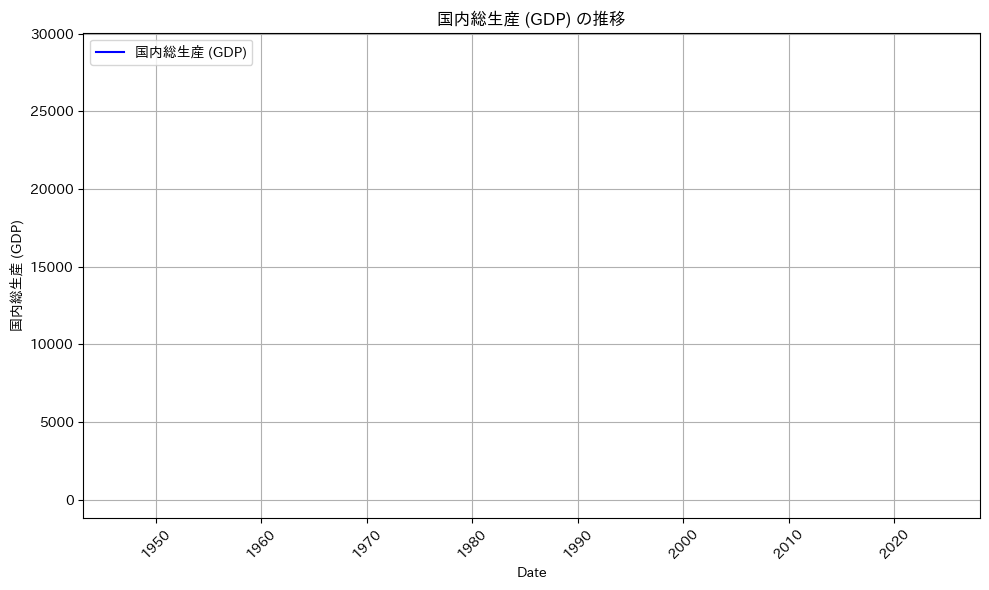

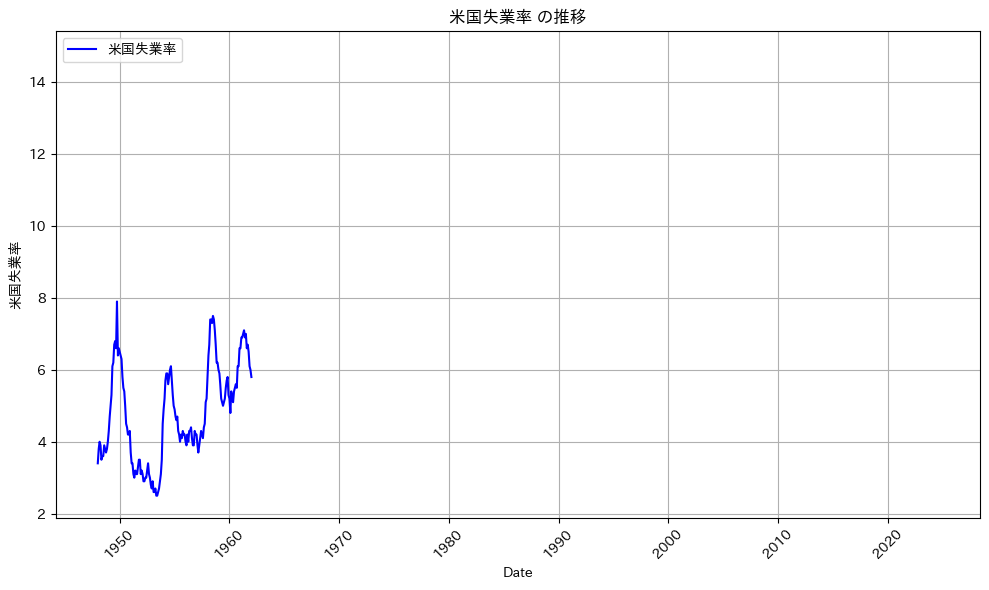

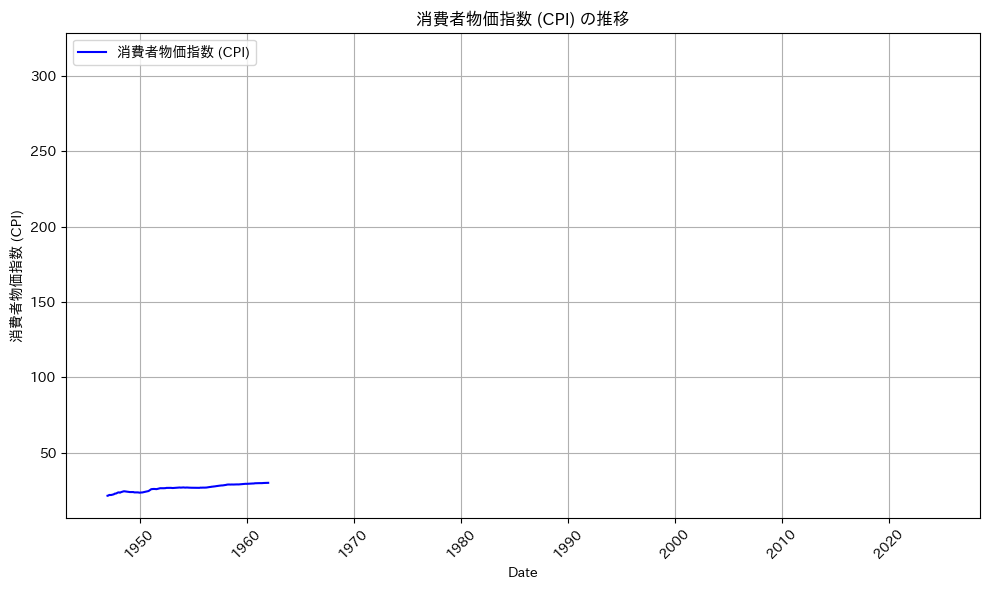

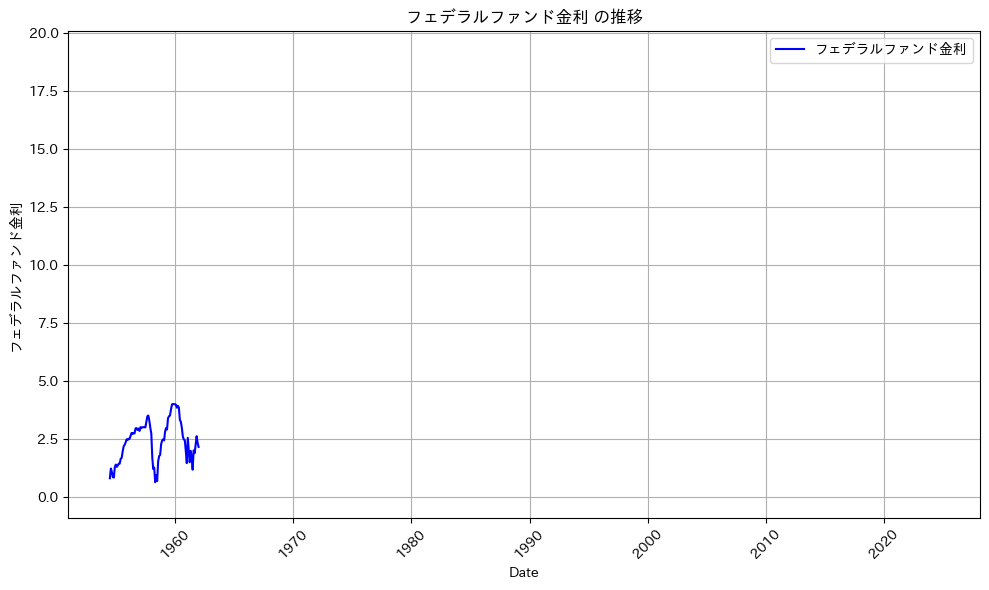

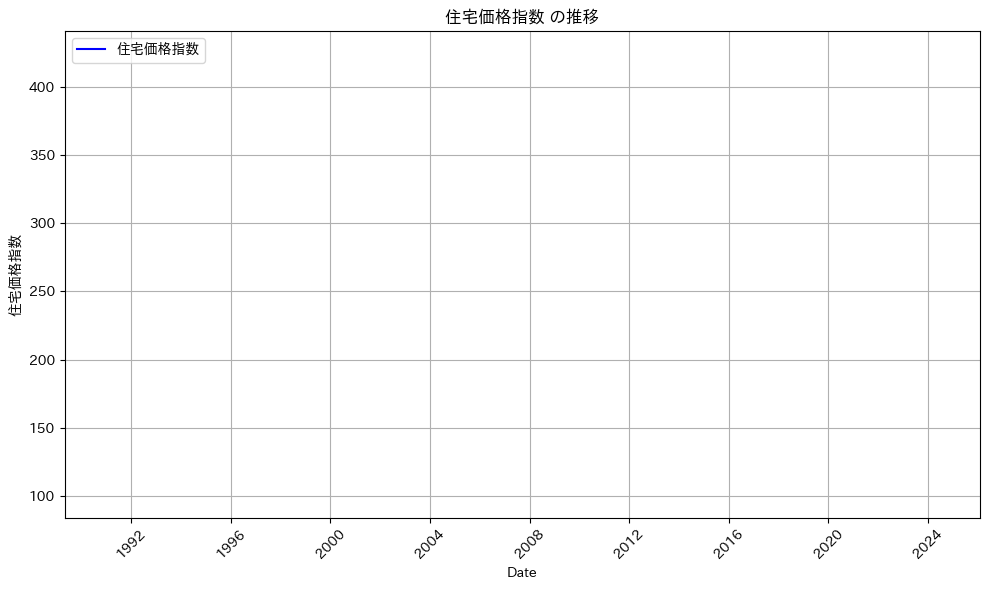

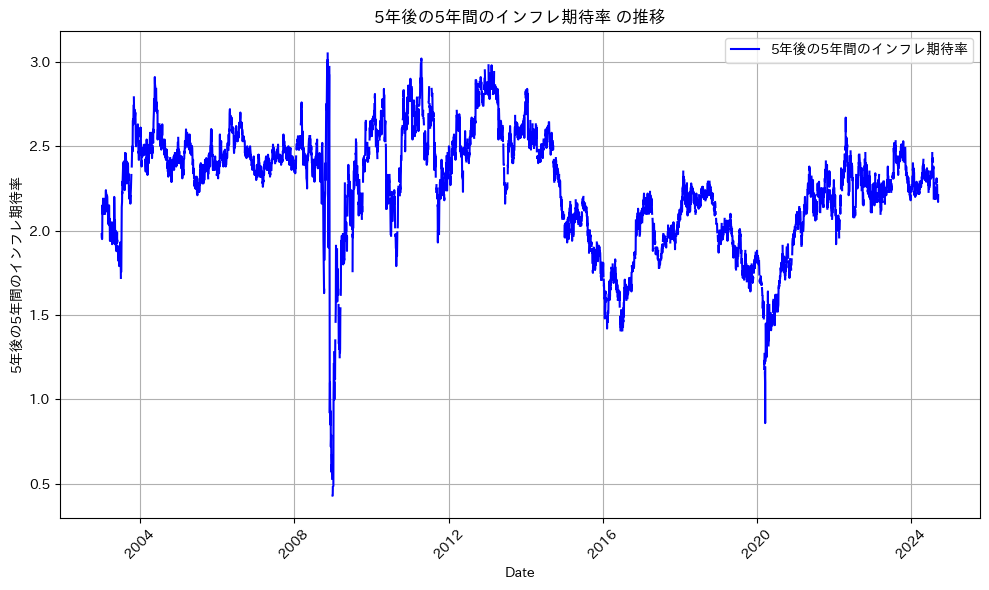

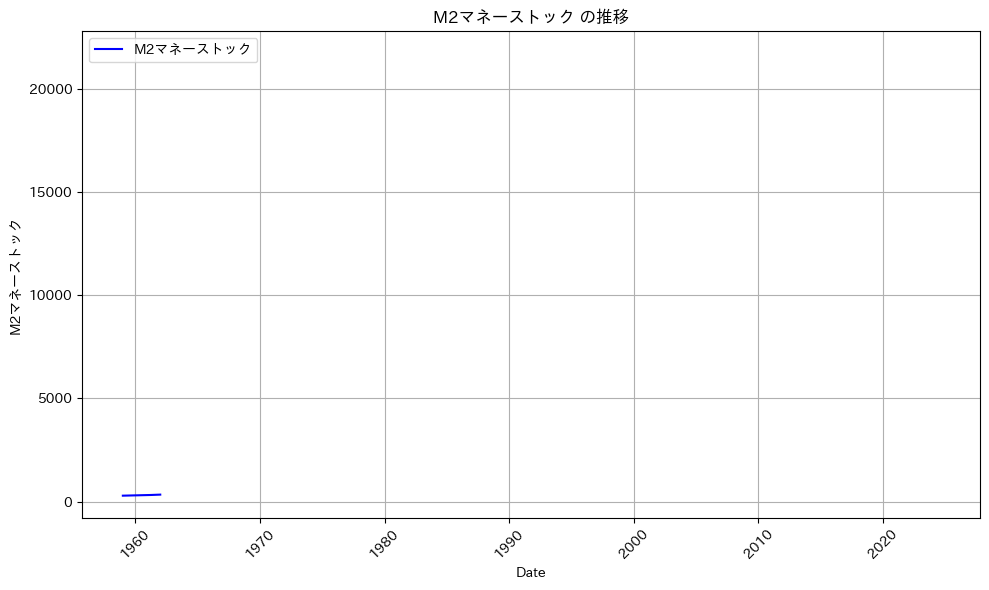

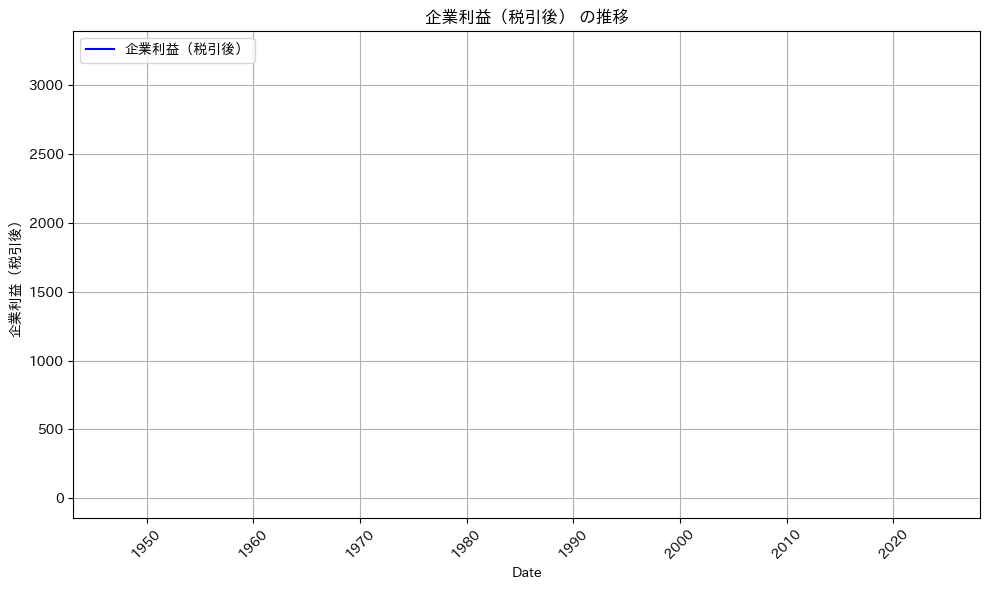

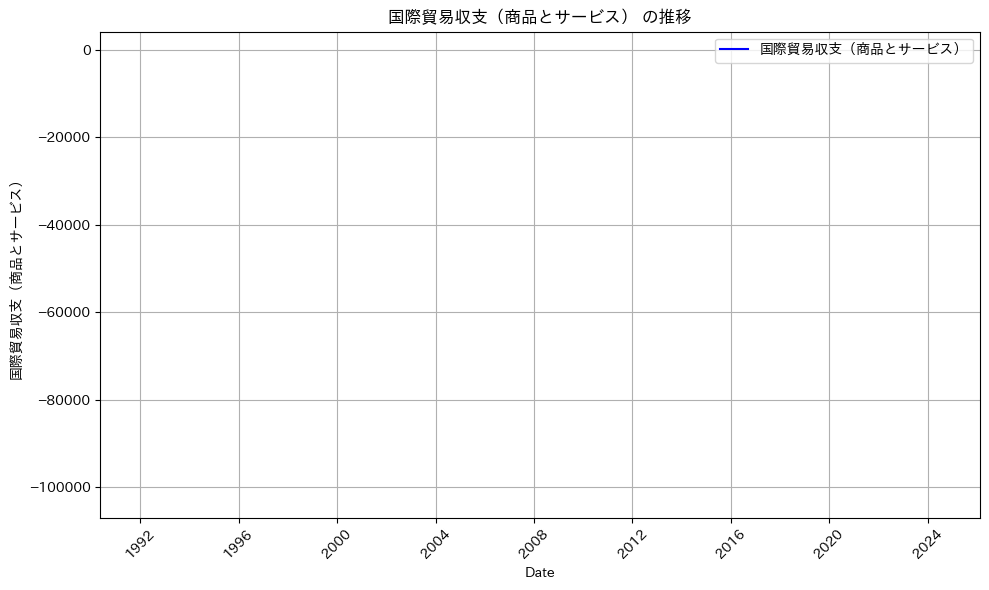

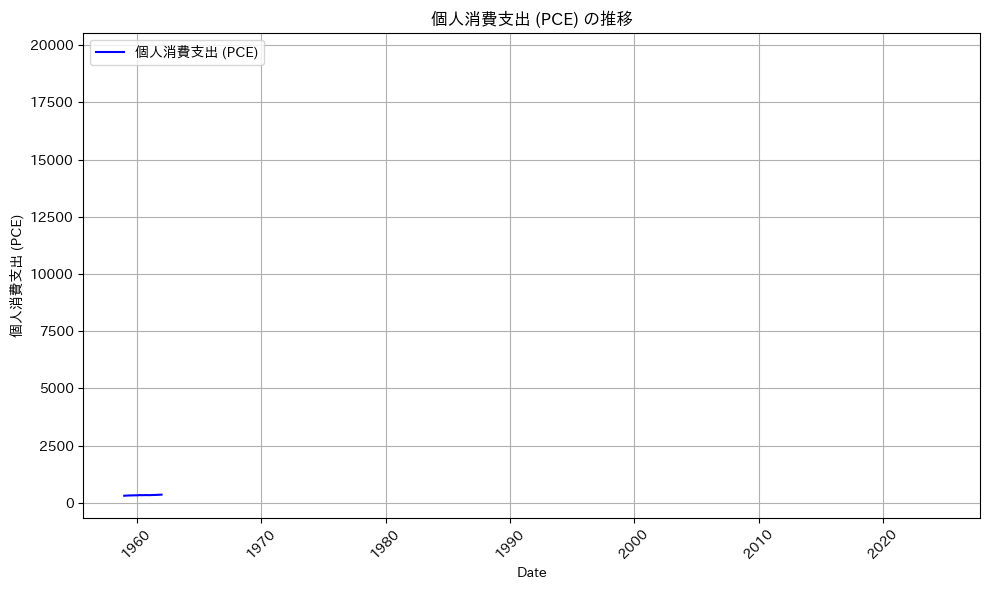

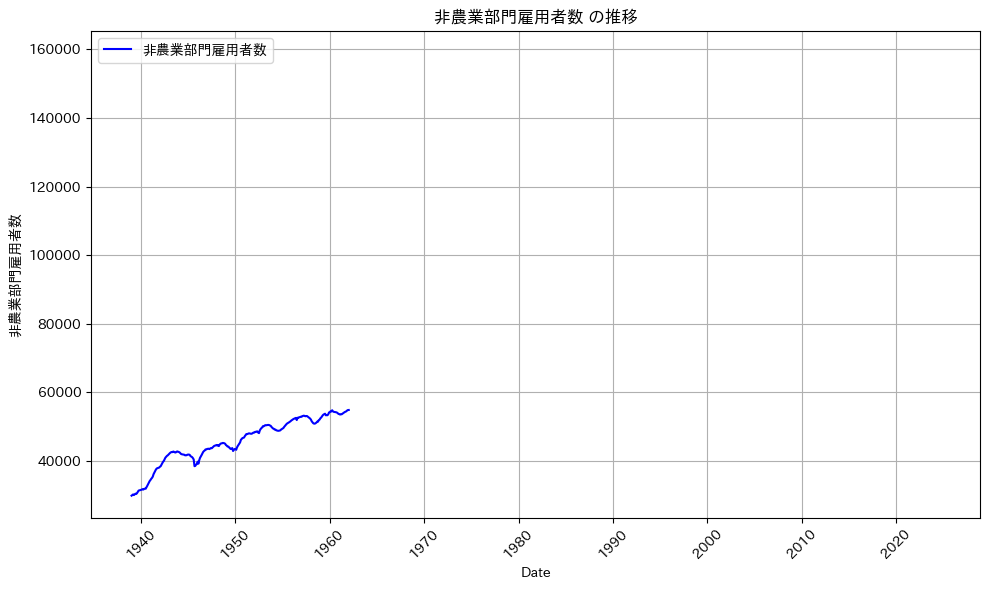

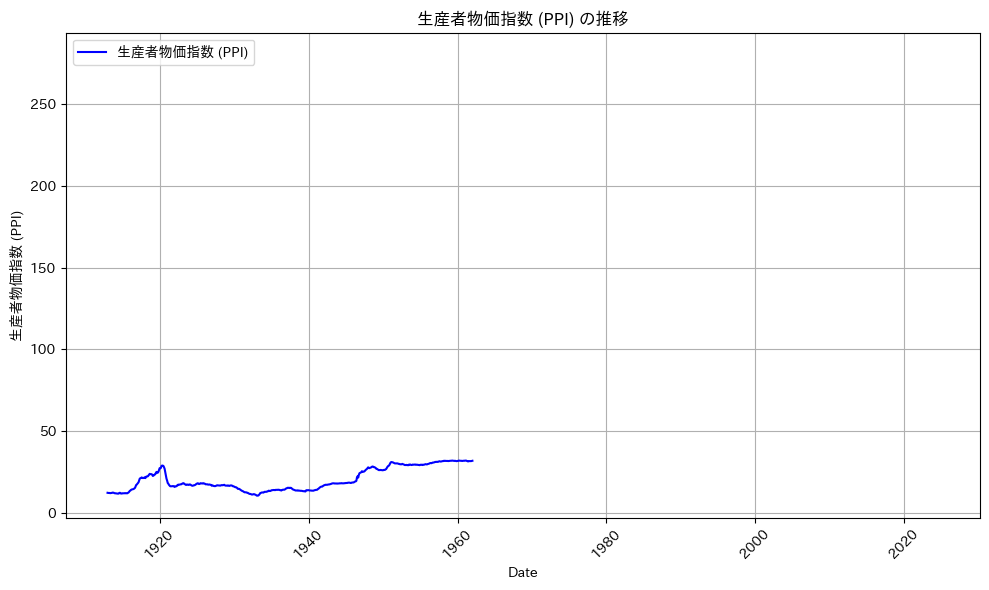

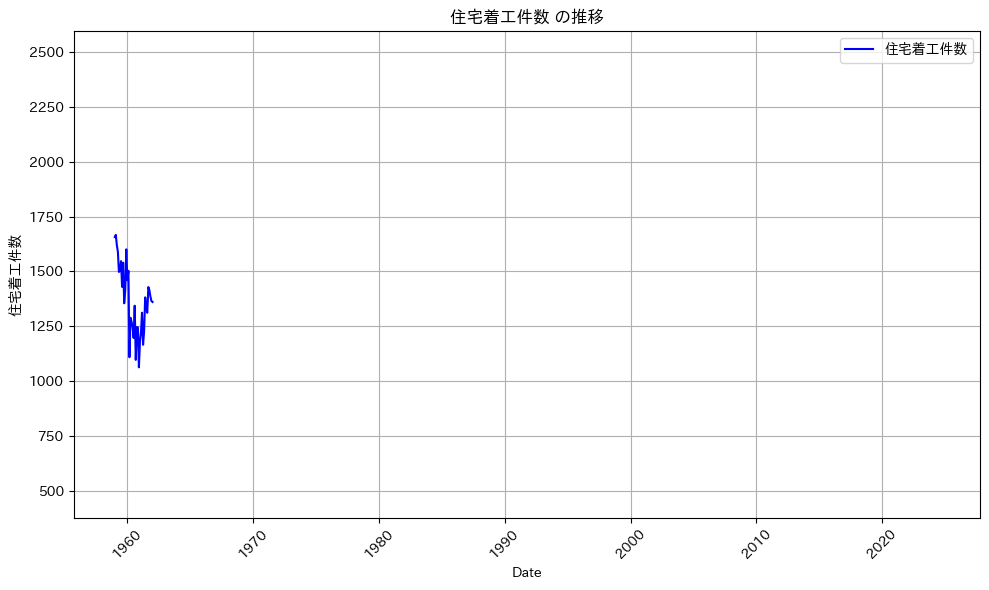

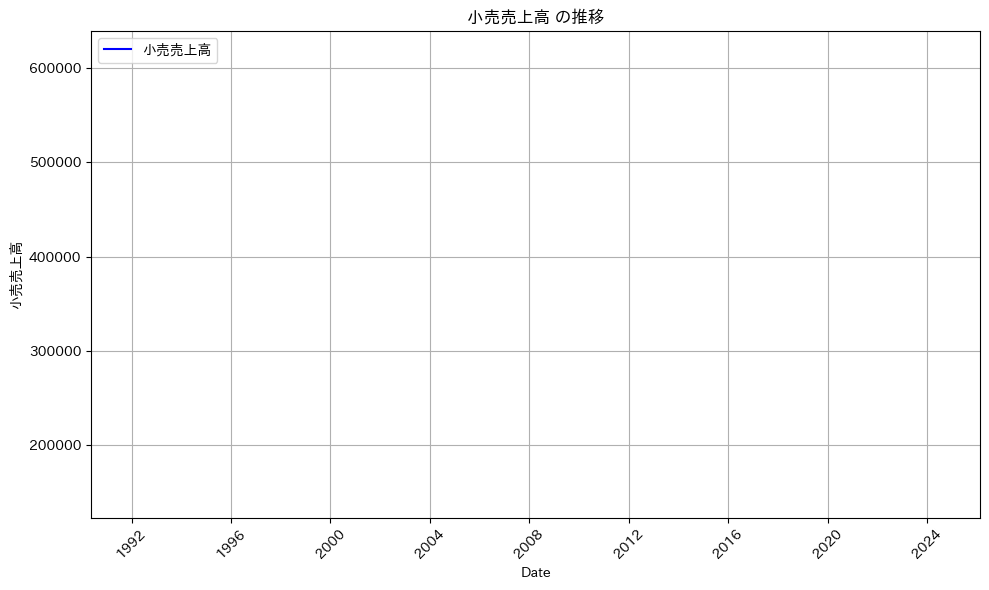

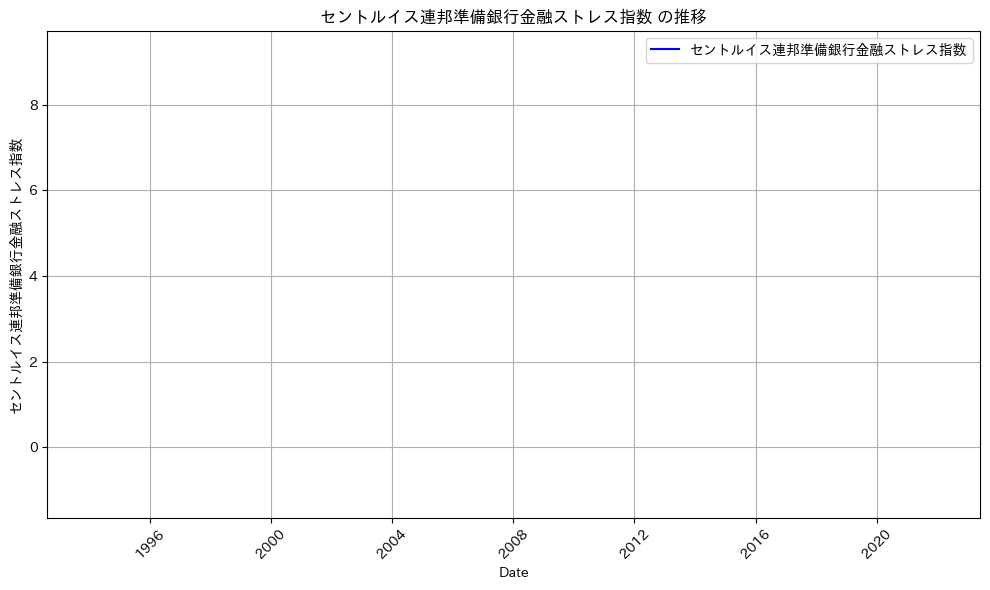

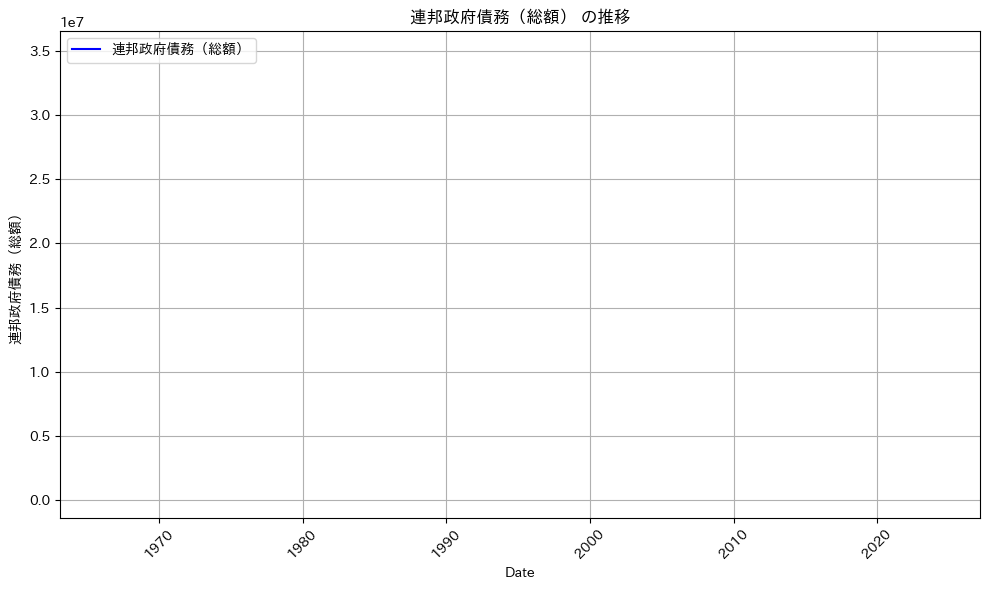

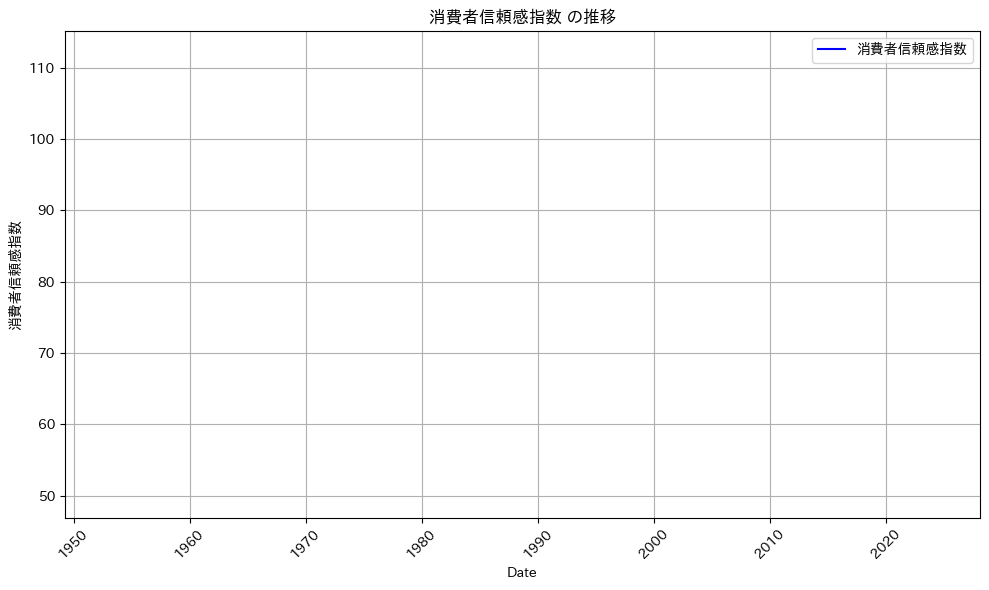

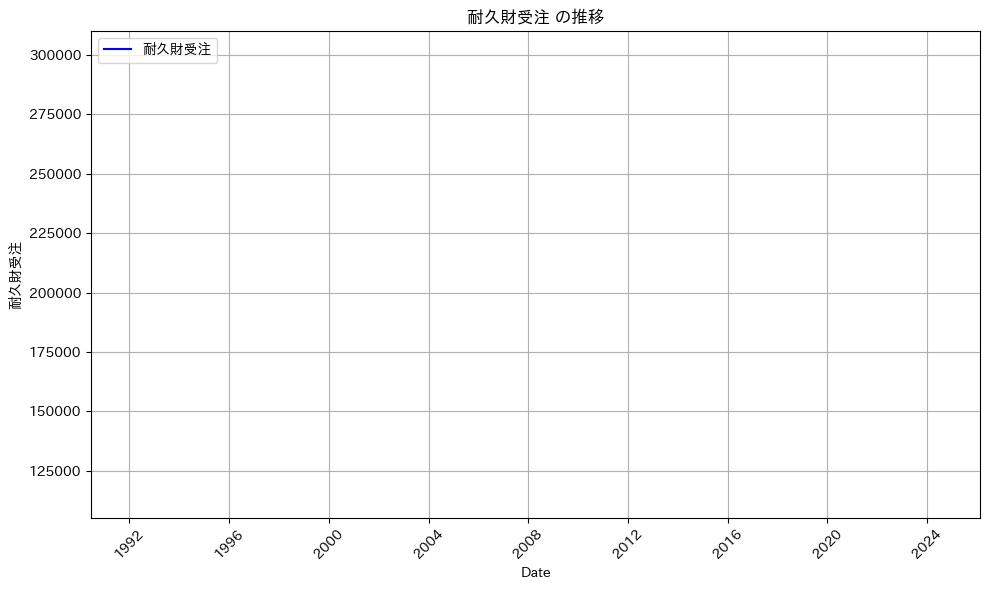

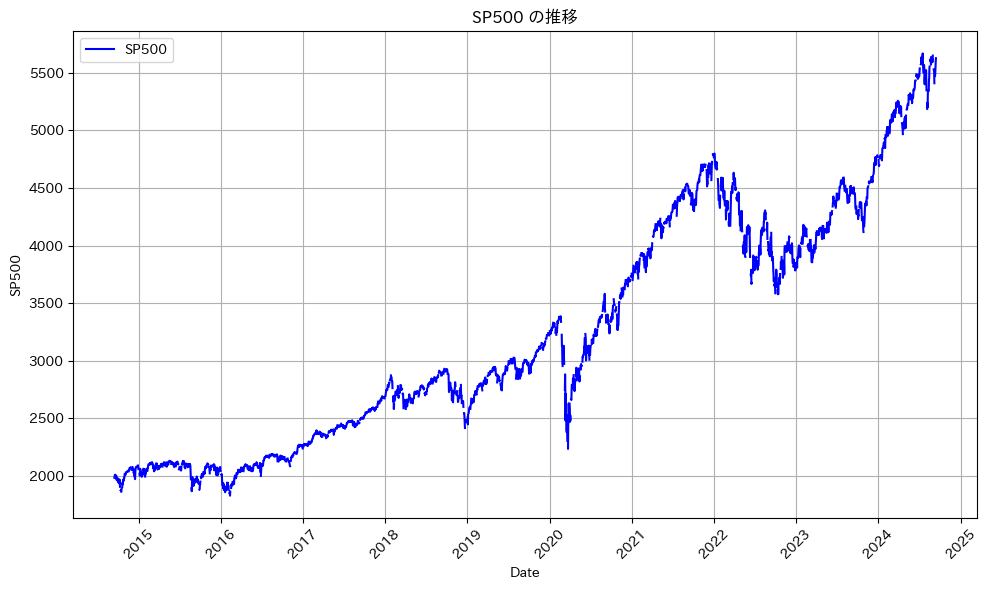

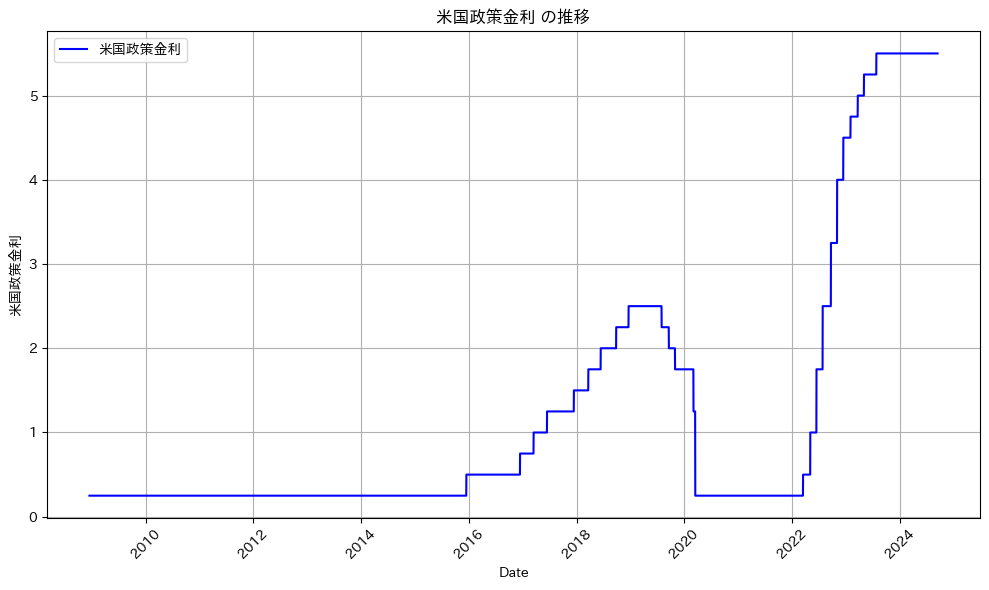

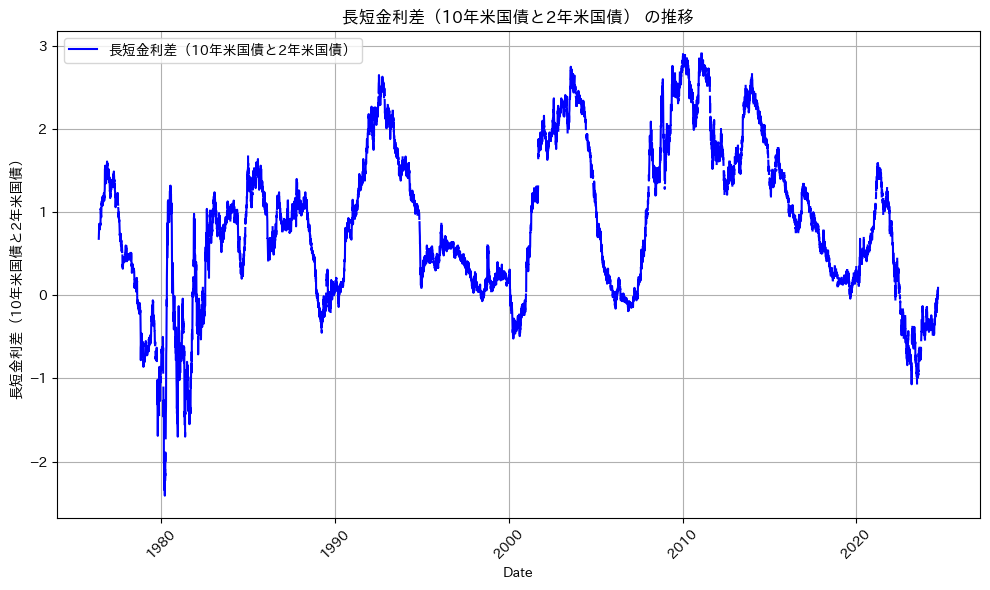

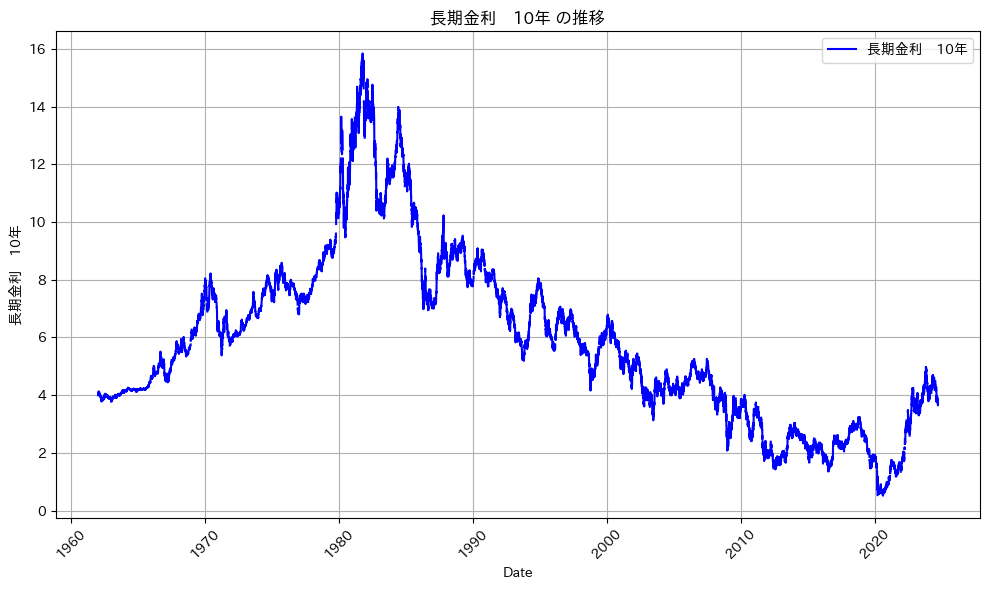

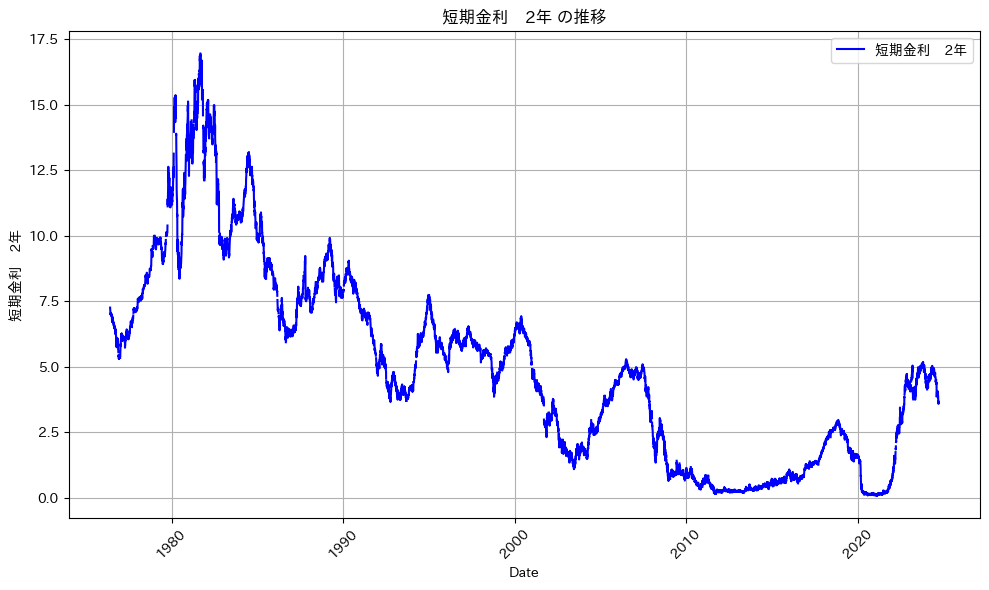

In [13]:
import matplotlib.pyplot as plt

# 特徴量を一つ一つグラフ化する関数
def plot_fred_data(data_df):
    for column in data_df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(data_df.index, data_df[column], label=column, color='b')
        plt.title(f'{column} の推移')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.grid(True)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# データをグラフ化
plot_fred_data(all_data_df)


In [14]:
all_data_df['国内総生産 (GDP)'].value_counts()

国内総生産 (GDP)
243.164      1
8866.480     1
9900.169     1
9686.626     1
9526.210     1
            ..
1290.566     1
1266.369     1
1230.609     1
1190.297     1
28652.337    1
Name: count, Length: 310, dtype: int64

In [16]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18752 entries, 1913-01-01 to 2024-09-14
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   国内総生産 (GDP)           310 non-null    float64
 1   米国失業率                 920 non-null    float64
 2   消費者物価指数 (CPI)         932 non-null    float64
 3   フェデラルファンド金利           842 non-null    float64
 4   住宅価格指数                402 non-null    float64
 5   5年後の5年間のインフレ期待率       5431 non-null   float64
 6   M2マネーストック             787 non-null    float64
 7   企業利益（税引後）             310 non-null    float64
 8   国際貿易収支（商品とサービス）       391 non-null    float64
 9   個人消費支出 (PCE)          787 non-null    float64
 10  非農業部門雇用者数             1028 non-null   float64
 11  生産者物価指数 (PPI)         1340 non-null   float64
 12  住宅着工件数                787 non-null    float64
 13  小売売上高                 391 non-null    float64
 14  セントルイス連邦準備銀行金融ストレス指数  1463 non-null   float64
 15  連邦

In [26]:
gdp = all_data_df[all_data_df['国内総生産 (GDP)'].notna()]['国内総生産 (GDP)']
gdp.values

array([  243.164,   245.968,   249.585,   259.745,   265.742,   272.567,
         279.196,   280.366,   275.034,   271.351,   272.889,   270.627,
         280.828,   290.383,   308.153,   319.945,   336.   ,   344.09 ,
         351.385,   356.178,   359.82 ,   361.03 ,   367.701,   380.812,
         387.98 ,   391.749,   391.171,   385.97 ,   385.345,   386.121,
         390.996,   399.734,   413.073,   421.532,   430.221,   437.092,
         439.746,   446.01 ,   451.191,   460.463,   469.779,   472.025,
         479.49 ,   474.864,   467.54 ,   471.978,   485.841,   499.555,
         510.33 ,   522.653,   525.034,   528.6  ,   542.648,   541.08 ,
         545.604,   540.197,   545.018,   555.545,   567.664,   580.612,
         594.013,   600.366,   609.027,   612.28 ,   621.672,   629.752,
         644.444,   653.938,   669.822,   678.674,   692.031,   697.319,
         717.79 ,   730.191,   749.323,   771.857,   795.734,   804.981,
         819.638,   833.302,   844.17 ,   848.983, 

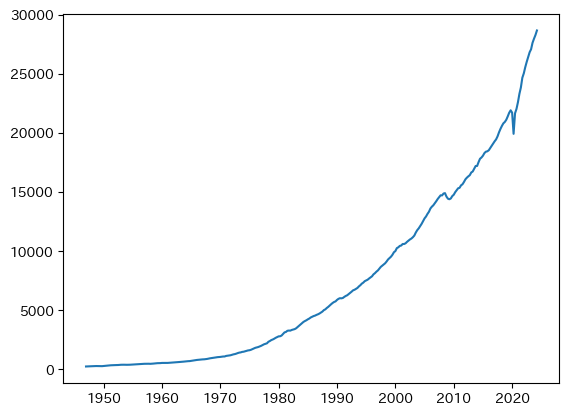

In [28]:
plt.plot(gdp.index, gdp.values)